# Энергия ферромагнетика 3D (2024)

### Условие задачи

**Дано:**
- трехмерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y \times L_z$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{L_x L_y L_z}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8], L_y = 2, L_z = 2$
    - температурах $kT \in [1.0, 10.0]$ с шагом $0.2$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $L_x$ или по $kT$
- вывести нормированные значения средней энергии на экран (см. пример в разделе Проверка корректности результатов)
- отобразить **цветовую карту**, используя сохраненный массив:
    - ось абсцисс (`x`) - $L_x$,
    - ось ординат (`y`) - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{L_x L_y L_z}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $L_x, kT$.
- отобразить **график**, используя сохраненный массив:
  - при $L_x = 4$
  - ось абсцисс (`x`) - $k T$
  - ось ординат - нормированное значение средней энергии $\frac{\langle E \rangle}{L_x L_y L_z}$
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения; cм. [docstring-formats](https://realpython.com/documenting-python-code/#docstring-formats)   

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы.

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым).
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.

Средняя энергия системы
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом:
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$

**Трехмерный случай**

В случае трехмерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом:
$$E(\sigma) = -\sum_{i,j,k} J_{ijk}(\sigma_{i,j,k}\sigma_{i+1,j,k} + \sigma_{i,j,k}\sigma_{i,j+1,k} + \sigma_{i,j,k}\sigma_{i,j,k+1})$$

**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 10.0]$:

- для $L_x=4$

```
 -2.9999245  -2.99942704 -2.99751294 -2.99234641 -2.98120832 -2.96055993
 -2.92624559 -2.8739877  -2.80028775 -2.70359717 -2.58527526 -2.4497323
 -2.30352171 -2.15378271 -2.00677809 -1.86706074 -1.73733502 -1.61876535
 -1.51143987 -1.41479962 -1.32795939 -1.24991655 -1.17967258 -1.11629579
 -1.05894797 -1.00689072 -0.9594814  -0.91616422 -0.87645988 -0.8399552
 -0.80629365 -0.77516695 -0.74630779 -0.71948375 -0.69449204 -0.67115517
 -0.64931722 -0.62884085 -0.6096046  -0.5915008  -0.57443364 -0.55831768
 -0.54307645 -0.52864137 -0.51495073 -0.50194891
```

- для $L_x=5$

```
 -2.99992424 -2.99942279 -2.99747931 -2.99217771 -2.98058943 -2.95875848
 -2.92188438 -2.86496311 -2.78406936 -2.67801634 -2.54952834 -2.40498666
 -2.25267579 -2.10053598 -1.95459576 -1.81851387 -1.69392282 -1.58106528
 -1.47938363 -1.38794061 -1.30567554 -1.2315422  -1.16457336 -1.10390466
 -1.04877746 -0.99853208 -0.95259735 -0.91047935 -0.8717507  -0.83604105
 -0.8030287  -0.77243351 -0.74401083 -0.71754637 -0.69285189 -0.66976157
 -0.64812887 -0.62782395 -0.60873144 -0.59074855 -0.57378347 -0.55775396
 -0.5425862  -0.52821375 -0.51457668 -0.5016208
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)
- [docstring-formats](https://realpython.com/documenting-python-code/#docstring-formats)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x \times L_y \times L_z$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - не построена график - 10
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [4]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import time
from time import perf_counter

In [5]:
@njit
def roll_3d(arr: np.ndarray, shift: int, axis: int = 0) -> np.ndarray:
    """
    Сдвигает спины вдоль выбранной оси

    Параметры
    ---------
    arr: np.ndarray
        массив спинов
    shift: int
        число позиций, на которое нужно сдвинуть
    axis: int
        номер оси для сдвига

    Возвращает
    ----------
    np.ndarray
        новый массив со сдвинутыми элементами
    """
    res = np.empty_like(arr)
    if axis == 0:
        for j in range(arr.shape[1]):
            for k in range(arr.shape[2]):
                res[:, j, k] = np.roll(arr[:, j, k], shift)
    elif axis == 1:
        for i in range(arr.shape[0]):
            for k in range(arr.shape[2]):
                res[i, :, k] = np.roll(arr[i, :, k], shift)
    elif axis == 2:
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                res[i, j] = np.roll(arr[i, j], shift)
    return res

In [6]:
@njit
def energy_njit_3d(sigma: np.ndarray) -> int:
    """
    Вычисление энергию для определенного состояния sigma

    Параметры
    ---------
    sigma: np.ndarray
        массив спинов (определенное состояние решетки)

    Возвращает
    ----------
    int
        энергия для состояния sigma
    """
    return -np.sum(
        sigma * roll_3d(sigma, 1, axis=0) +
        sigma * roll_3d(sigma, 1, axis=1) +
        sigma * roll_3d(sigma, 1, axis=2)
    )

In [7]:
@njit
def mean_energy_njit_3d(Lx: int, Ly: int, Lz: int, kT: np.ndarray) -> np.ndarray:
    """
    Вычисление средней энергии решетки

    Параметры
    ---------
    Lx, Ly, Lz: int
        размеры решетки
    kT: np.ndarray
        массив температур

    Возвращает
    ----------
    np.ndarray
        средняя энергия при каждой температуре (массив)
    """
    ME = np.zeros_like(kT)
    Z = np.zeros_like(kT)
    sigma = np.ones((Lx, Ly, Lz), dtype=np.int8)

    for x in range(2**(Lx * Ly * Lz - 1)):
        for i in range(Lx * Ly * Lz - 1):
            sigma.flat[i + 1] = 1 if (x & (1 << i)) else -1
        E = energy_njit_3d(sigma)

        for idx, temp in enumerate(kT):
            e = np.exp(-E / temp)
            ME[idx] += E * e
            Z[idx] += e

    ME /= Z
    return ME / (Lx * Ly * Lz)

In [8]:
# вводим константы и объявляем переменные
Lx, Ly, Lz = np.arange(2, 9), 2, 2 # размеры решетки
kT_val = np.arange(1.0, 10.1, 0.2) # массив температур
energy_arr = np.zeros((len(Lx), len(kT_val))) # массив для записи результатов
time_arr = np.zeros(len(Lx)) #массив для записи времени выполнения

In [9]:
def solution(i : int):
  """
  Выводит время выполнения и среднюю энергию решетки для фиксированного Lx

  Параметры
  ---------
  i : int
      номер Lx
  """
  start_time = perf_counter()
  energy_arr[i] = mean_energy_njit_3d(Lx[i], Ly, Lz, kT_val)
  time_arr[i] = perf_counter() - start_time
  print(f"Lx = {Lx[i]}\ndt = {time_arr[i]:.2e}\n{energy_arr[i]}")

In [ ]:
solution (0)

Lx = 2
dt = 7.11e+00
[-2.99992277 -2.99940317 -2.99736364 -2.99178853 -2.97977895 -2.95790181
 -2.92276068 -2.87167959 -2.80333038 -2.71810591 -2.61810385 -2.50672769
 -2.38805528 -2.26618671 -2.14474161 -2.02657915 -1.91372452 -1.80743787
 -1.70835539 -1.61664863 -1.53217009 -1.45457143 -1.38339175 -1.31811953
 -1.25823359 -1.20322855 -1.15262933 -1.10599845 -1.06293858 -1.02309213
 -0.98613933 -0.9517953  -0.91980682 -0.88994909 -0.86202257 -0.83585005
 -0.811274   -0.78815423 -0.76636573 -0.74579689 -0.72634782 -0.70792898
 -0.69045989 -0.67386814 -0.65808836 -0.64306147]


In [ ]:
solution (1)

Lx = 3
dt = 6.43e-03
[-2.99992393 -2.99942019 -2.99747863 -2.99225874 -2.98112235 -2.96079945
 -2.92764643 -2.87807162 -2.80919879 -2.71968369 -2.61038926 -2.48455286
 -2.34727034 -2.20447526 -2.06183464 -1.92394718 -1.79399892 -1.67380734
 -1.56408495 -1.46476666 -1.375306   -1.29490194 -1.22265407 -1.1576588
 -1.09906339 -1.04609199 -0.99805462 -0.95434629 -0.91444117 -0.87788448
 -0.84428379 -0.81330073 -0.78464324 -0.75805888 -0.73332897 -0.71026352
 -0.68869701 -0.66848477 -0.64949994 -0.63163093 -0.61477925 -0.59885767
 -0.58378873 -0.56950338 -0.55593992 -0.54304305]


In [ ]:
solution (2)

Lx = 4
dt = 2.05e-01
[-2.9999237  -2.99941683 -2.99745491 -2.99215129 -2.98075711 -2.95977769
 -2.92516744 -2.87271665 -2.7987953  -2.70145673 -2.58153963 -2.44312062
 -2.29285821 -2.138432   -1.98684449 -1.8433076  -1.71093821 -1.59104384
 -1.48365037 -1.38801805 -1.30303452 -1.22747061 -1.16012657 -1.09990427
 -1.04583455 -0.99708001 -0.95292579 -0.91276534 -0.87608532 -0.8424512
 -0.8114945  -0.78290189 -0.75640594 -0.73177755 -0.70881955 -0.68736158
 -0.66725576 -0.64837319 -0.63060106 -0.61384019 -0.59800309 -0.58301228
 -0.56879888 -0.55530146 -0.54246503 -0.53024025]


In [ ]:
solution (3)

Lx = 5
dt = 2.11e+00
[-2.99992348 -2.99941345 -2.9974306  -2.99203854 -2.98036335 -2.95865253
 -2.92241791 -2.86683839 -2.78768195 -2.68278465 -2.55355303 -2.40547447
 -2.24697    -2.08708357 -1.93331414 -1.79054692 -1.66111244 -1.54544715
 -1.44284719 -1.35205941 -1.27165922 -1.20025716 -1.13659411 -1.07957279
 -1.02825703 -0.98185674 -0.93970822 -0.90125436 -0.86602674 -0.83363029
 -0.80373048 -0.77604271 -0.75032373 -0.72636465 -0.70398515 -0.6830289
 -0.66335972 -0.64485847 -0.62742048 -0.6109534  -0.59537546 -0.58061398
 -0.56660417 -0.55328801 -0.54061345 -0.52853362]


In [ ]:
solution (4)

Lx = 6
dt = 3.83e+01
[-2.99992325 -2.99941006 -2.99740629 -2.99192581 -2.97996974 -2.95752962
 -2.91968708 -2.86106403 -2.77698637 -2.66539354 -2.52866853 -2.37393385
 -2.21112664 -2.04995649 -1.89761619 -1.75812084 -1.63285787 -1.52153452
 -1.42299998 -1.33578691 -1.25840941 -1.18950133 -1.12786521 -1.0724769
 -1.02247105 -0.97712006 -0.93581272 -0.89803468 -0.86335179 -0.83139614
 -0.80185458 -0.77445933 -0.74898038 -0.72521919 -0.70300367 -0.68218396
 -0.66262902 -0.64422379 -0.62686688 -0.61046858 -0.59494923 -0.58023788
 -0.56627111 -0.55299207 -0.54034964 -0.52829772]


In [ ]:
solution (5)

Lx = 7
dt = 6.72e+02
[-2.99992302 -2.99940668 -2.99738198 -2.99181314 -2.97957696 -2.95641312
 -2.91699296 -2.85545084 -2.76684605 -2.64951867 -2.50709905 -2.34829307
 -2.18404412 -2.024016   -1.87459019 -1.73879769 -1.61726949 -1.50928634
 -1.4135339  -1.32853862 -1.2528819  -1.18528769 -1.12464601 -1.07000758
 -1.02056704 -0.97564311 -0.93465959 -0.89712827 -0.86263441 -0.83082445
 -0.80139589 -0.77408885 -0.7486792  -0.72497281 -0.70280089 -0.68201607
 -0.66248924 -0.64410679 -0.62676843 -0.61038532 -0.59487848 -0.58017749
 -0.56621933 -0.55294749 -0.5403111  -0.52826428]


In [2]:
solution (6)

Lx = 8
dt = 1.23e+04
[-2.99992279 -2.99940329 -2.99735768 -2.99170056 -2.97918515 -2.95530418
 -2.91434146 -2.85002057 -2.75731206 -2.63521054 -2.48871902 -2.32786776
 -2.16402279 -2.00627653 -1.86002799 -1.72747919 -1.60879244 -1.50308595
 -1.40906084 -1.32533296 -1.25058812 -1.18364298 -1.1234614  -1.06914906
 -1.01994037 -0.97518197 -0.9343174  -0.8968722  -0.86244116 -0.83067736
 -0.80128303 -0.77400156 -0.74861112 -0.72491937 -0.70275861 -0.68198237
 -0.6624622  -0.64408496 -0.62675067 -0.61037083 -0.59486658 -0.58016764
 -0.56621115 -0.55294066 -0.54030538 -0.52825944]



In [38]:
#сохранение результатов
np.save('energy.npy', energy_arr)

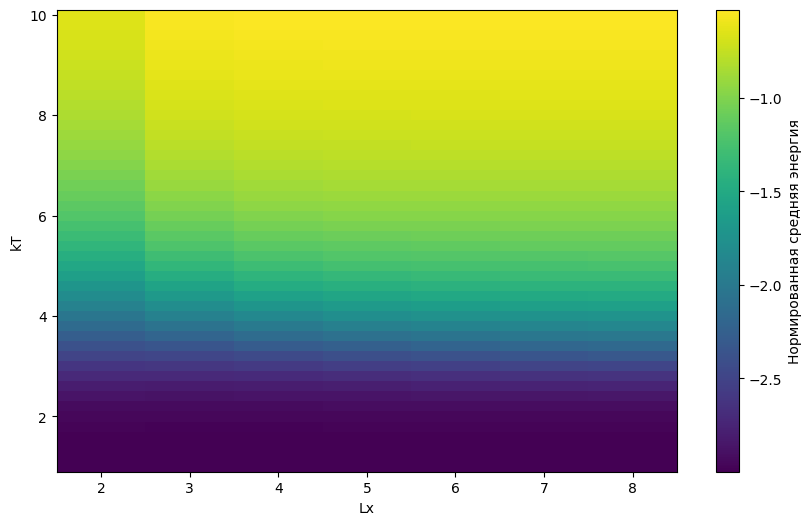

In [46]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(Lx, kT_val, energy_arr.T, shading='auto', cmap='viridis')
plt.colorbar(label = "Нормированная средняя энергия")
plt.xlabel('Lx')
plt.ylabel('kT')
plt.show()

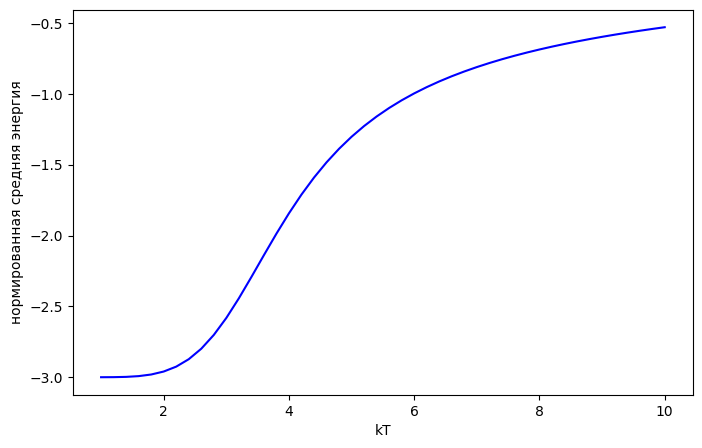

In [52]:
#график нормированной средней энергии при Lx=4
plt.figure(figsize=(8, 5))
plt.plot(kT_val, energy_arr[2].flatten(), color='blue')
plt.xlabel('kT')
plt.ylabel('нормированная средняя энергия')
plt.show()